# Lagoa da Pata


Fonte utilizada para desenvolver os gráficoss: https://python-graph-gallery.com/

In [12]:
pip install openpyxl

### Importar as bibliotecas necessárias

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## Gráfico de MO (COT, N, C/N)

#### Gráfico de linha com subplots compartilhando o eixo y

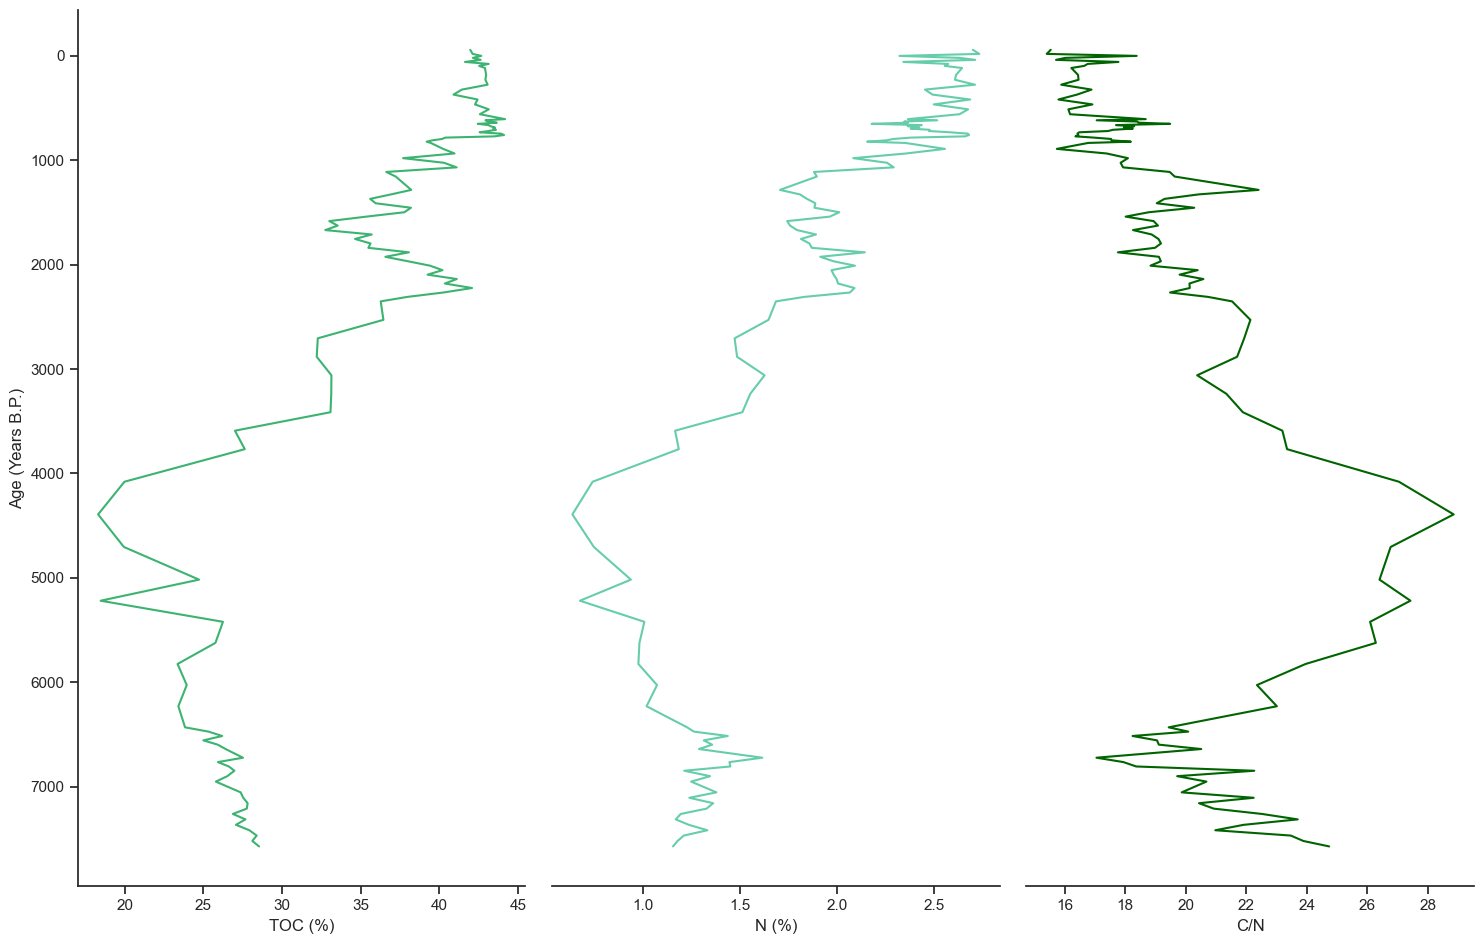

In [129]:
data = pd.read_excel(r'C:\Users\nayar\OneDrive\Documentos\docs facul\Mestrado\LPTV-5_MO.xlsx', engine='openpyxl')

# Plotar o gráfico
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True) #cria uma grade de subplots com 1 linha e 3 colunas

# Primeiro plot para TOC
axes[0].plot(data['C'], data['Idade cal BP'], color='mediumseagreen', label='TOC (%)')
axes[0].set_xlabel('TOC (%)')
axes[0].set_ylabel('Age (Years B.P.)')
axes[0].invert_yaxis()  # Inverter eixo Y
axes[0].grid(False)

# Segundo plot para N
axes[1].plot(data['N'], data['Idade cal BP'], color='mediumaquamarine', label='TN (‰)')
axes[1].set_xlabel('N (%)')
axes[1].grid(False)
axes[1].tick_params(left=False) #remove os ticks do eixo y subplot, para deixar o painel todo em branco

#Terceiro plot para razão C/N
axes[2].plot(data['C/N'], data['Idade cal BP'], color='darkgreen', label='C/N')
axes[2].set_xlabel('C/N')
axes[2].grid(False)
axes[2].tick_params(left=False)

#remover bordas
axes[0].spines['right'].set_visible(False)  # Remove a borda direita do primeiro subplot
axes[1].spines['left'].set_visible(False)   # Remove a borda esquerda do segundo subplot
axes[2].spines['left'].set_visible(False)
# Exibir o gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Gráfico para os isótopos de δ¹³C e δ15N

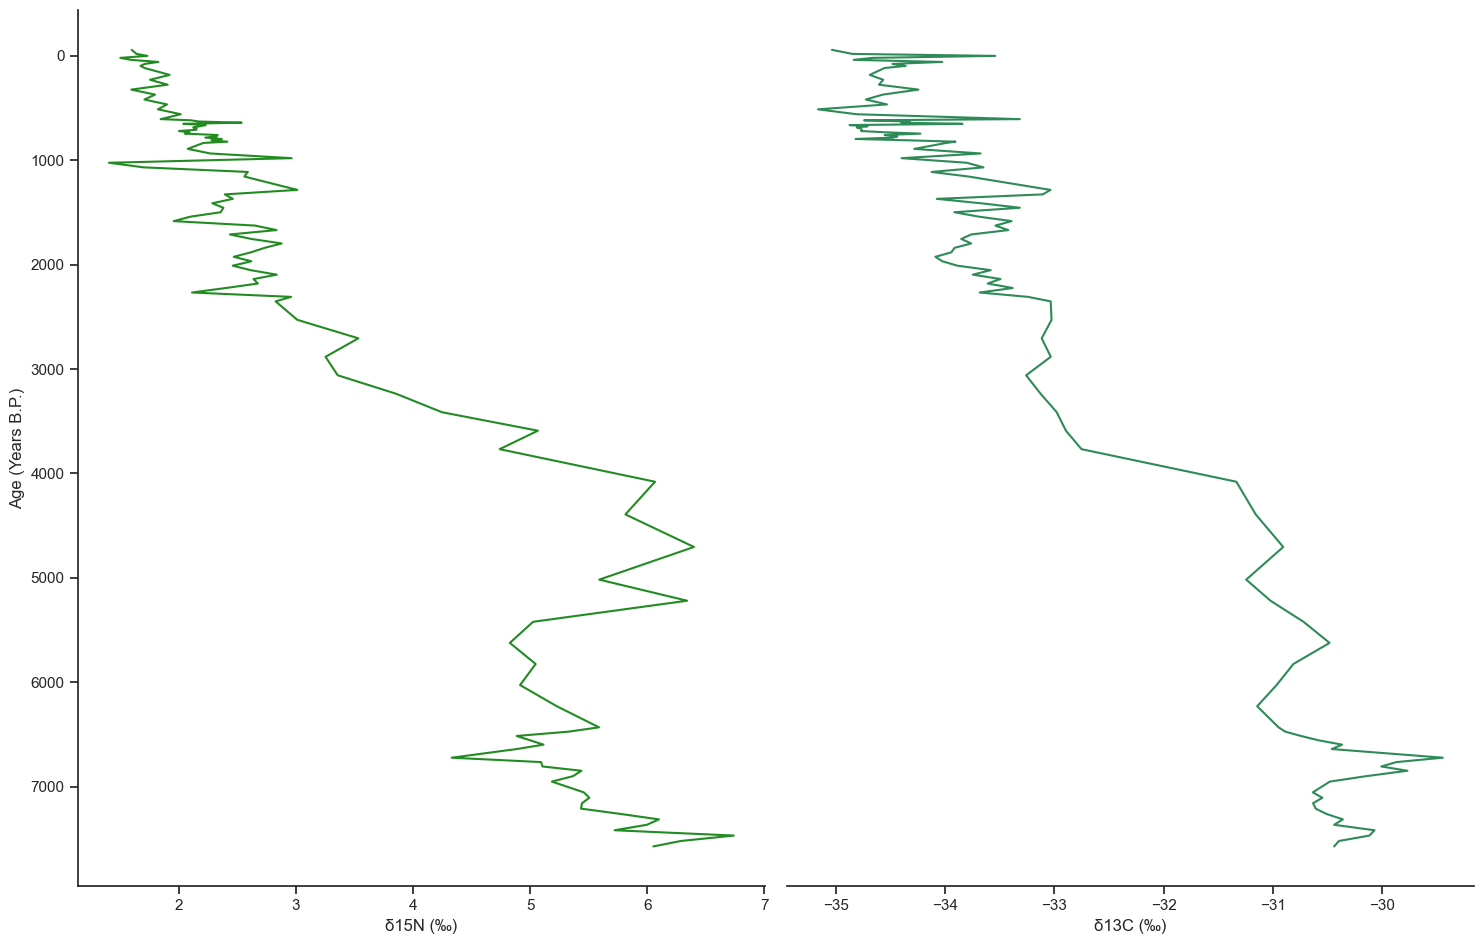

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True) #cria uma grade de subplots com 1 linha e 2 colunas

# Primeiro plot para TOC
axes[0].plot(data['15N'], data['Idade cal BP'], color='forestgreen', label='δ15N (‰)')
axes[0].set_xlabel('δ15N (‰)')
axes[0].set_ylabel('Age (Years B.P.)')
axes[0].invert_yaxis()  # Inverter eixo Y
axes[0].grid(False)

# Segundo plot para N
axes[1].plot(data['13C'], data['Idade cal BP'], color='seagreen', label='δ13C (‰)')
axes[1].set_xlabel('δ13C (‰)')
axes[1].grid(False)
axes[1].tick_params(left=False) #remove os ticks do eixo y subplot, para deixar o painel todo em branco

axes[0].spines['right'].set_visible(False)  # Remove a borda direita do primeiro subplot
axes[1].spines['left'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Gráfico de dispersão 

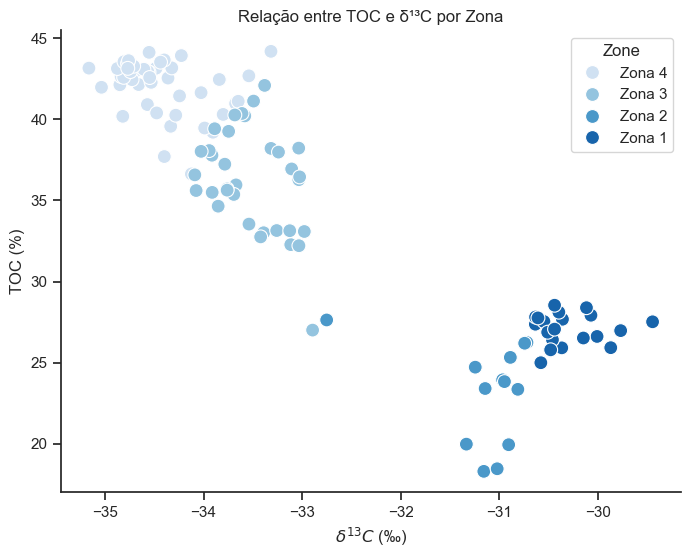

In [145]:
df = pd.DataFrame(data)

df 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='13C', y='C', hue='Zona', palette='Blues', s=100) #hue: define grupos nos dados por diferentes cores ou formar a partir de uma variável escolhida 

# Personalização dos eixos e legenda
plt.xlabel(r'$\delta^{13}C$ (‰)')
plt.ylabel('TOC (%)')
plt.legend(title='Zone')
plt.title('Relação entre TOC e δ¹³C por Zona')

plt.show()


## Análise de componentes principais (PCA)

In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [153]:
data1 = pd.read_excel(r'C:\Users\nayar\OneDrive\Documentos\docs facul\Mestrado\pca_cpolem.xlsx', engine='openpyxl')

In [157]:
data1

,Zone,15N,13C,%C,C/N,Fe,Ti,Nb,Polen Influx
0,I,1.8269,-34.0253,41.6367,17.7748,-0.469988,0.019704,-0.056677,7374.206349
1,I,1.7106,-34.4817,43.1411,16.7591,-0.636846,0.534740,0.828172,5508.794466
2,I,1.6738,-34.3605,42.5368,16.6421,-0.870596,0.482692,0.942393,6986.090226
3,I,1.7076,-34.5533,42.9061,16.2194,-0.644534,0.477445,0.709056,7198.819820
4,I,1.9232,-34.6886,42.9816,16.4398,0.189343,-0.107942,-0.202061,4205.626316
...,...,...,...,...,...,...,...,...,...
102,IV,5.9958,-30.4415,27.0660,21.9167,-1.421770,-1.421534,-1.525116,8919.840000
103,IV,5.7210,-30.0725,27.9217,20.9772,-1.040137,-0.972735,-1.152463,6968.625000
104,IV,6.7387,-30.1181,28.3874,23.4724,-0.663359,-0.440116,-0.591480,7941.452991
105,IV,6.2867,-30.3979,28.1112,23.8888,-0.771159,-0.405529,-0.832388,7254.261548


In [163]:
# Scale our data using z-score normalization
df1 = pd.DataFrame(data1)
df2 = df1.iloc[:, 1:]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)
df2 = pd.DataFrame(data_scaled, columns=df2.columns)

In [165]:
df2

,15N,13C,%C,C/N,Fe,Ti,Nb,Polen Influx
0,-1.005609,-0.662120,0.915090,-0.685672,-0.497473,0.050534,-0.043206,-0.018279
1,-1.081083,-0.935141,1.121107,-1.040111,-0.681839,0.699103,0.951680,-0.358161
2,-1.104964,-0.862639,1.038352,-1.080940,-0.940116,0.633559,1.080105,-0.088995
3,-1.083030,-0.977973,1.088925,-1.228446,-0.690333,0.626952,0.817751,-0.050235
4,-0.943114,-1.058910,1.099265,-1.151535,0.231041,-0.110207,-0.206670,-0.595600
...,...,...,...,...,...,...,...,...
102,1.699844,1.481729,-1.080260,0.759688,-1.549123,-1.764372,-1.694256,0.263338
103,1.521510,1.702467,-0.963078,0.431839,-1.127446,-1.199213,-1.275261,-0.092177
104,2.181957,1.675189,-0.899304,1.302566,-0.711133,-0.528503,-0.644516,0.085074
105,1.888627,1.507811,-0.937128,1.447873,-0.830245,-0.484948,-0.915382,-0.040133


In [179]:
pca = PCA(n_components=2) #inicializa um objeto PCA

pca_results = pca.fit_transform(data_scaled)

In [181]:
zona = df1['Zone']

In [183]:
zona


0       I
1       I
2       I
3       I
4       I
       ..
102    IV
103    IV
104    IV
105    IV
106    IV
Name: Zone, Length: 107, dtype: object

In [193]:
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['Zone'] = zona

In [195]:
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='PC1', ylabel='PC2'>

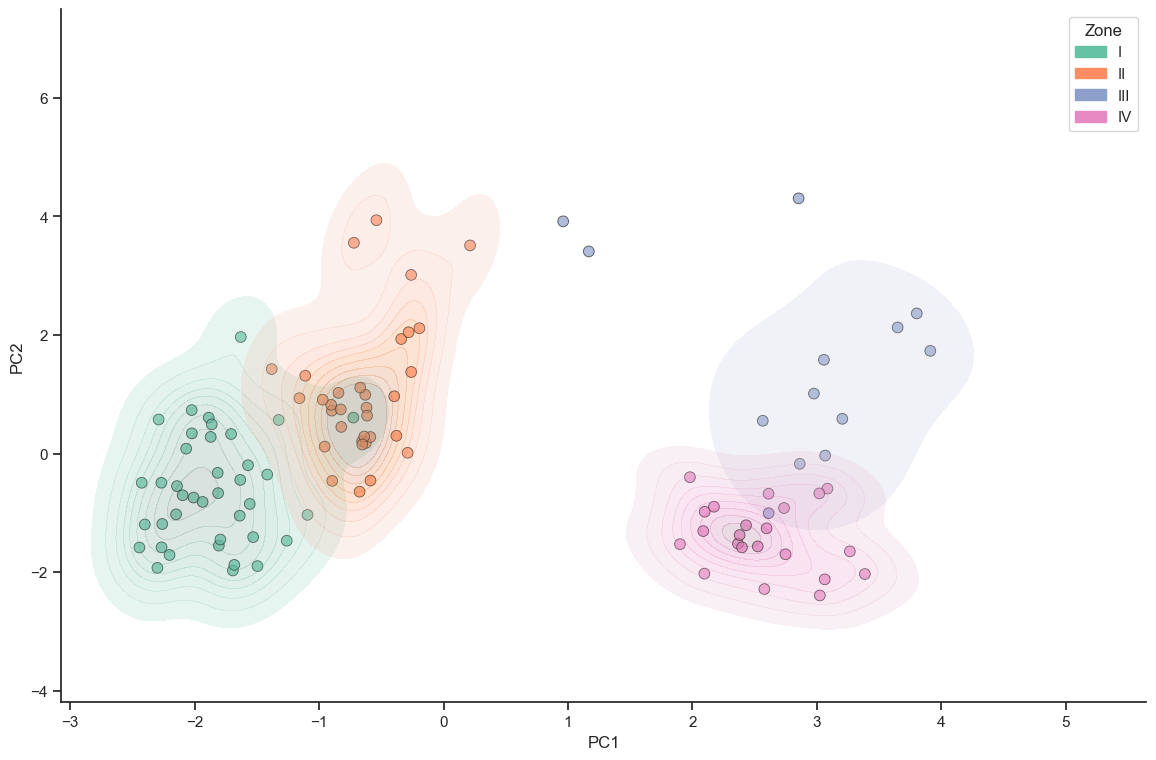

In [247]:
fig, ax = plt.subplots(figsize = (14,9))
sns.scatterplot(x='PC1', y='PC2', hue='Zone', data=pca_df, palette='Set2', s=60, edgecolor='k', alpha=0.7,ax=ax)
sns.kdeplot(x='PC1', y='PC2', hue='Zone', data=pca_df, palette='Set2', fill=True, alpha=0.2)


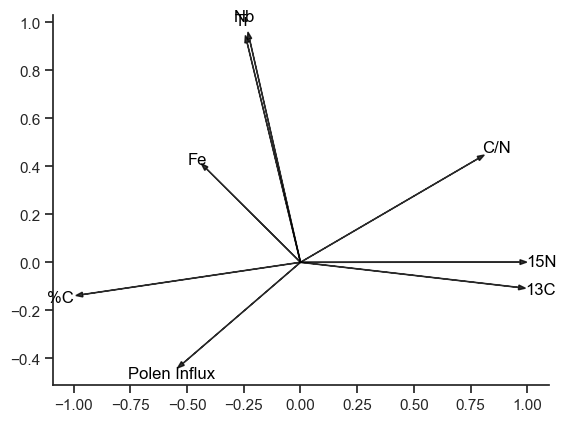

In [249]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(df2.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='black', alpha=0.8, head_width=0.02)
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, var, color='black', ha='center', va='center')


In [251]:
import plotly.express as px

In [269]:
features = ['15N',	'13C',	'%C', 'C/N', 'Fe', 'Ti', 'Nb', 'Polen Influx']

components = pca.fit_transform(df2)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df1['Zone'])

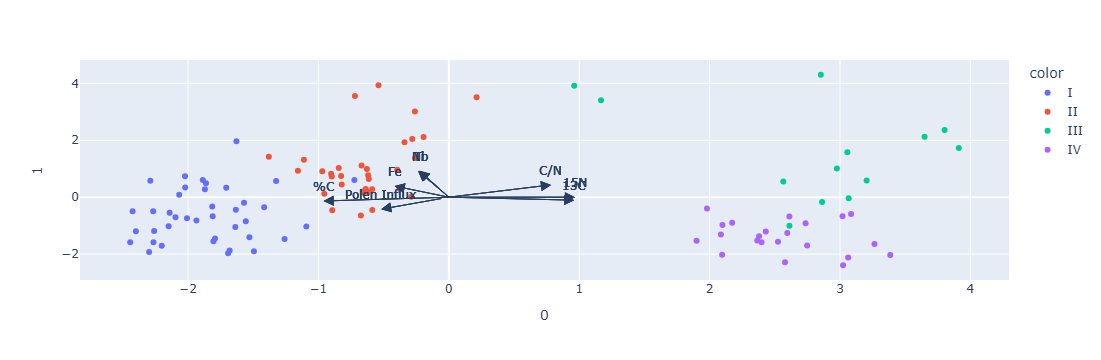

In [275]:
for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )

fig.show()


## Multi panel highlighted lineplots com Matplotlib

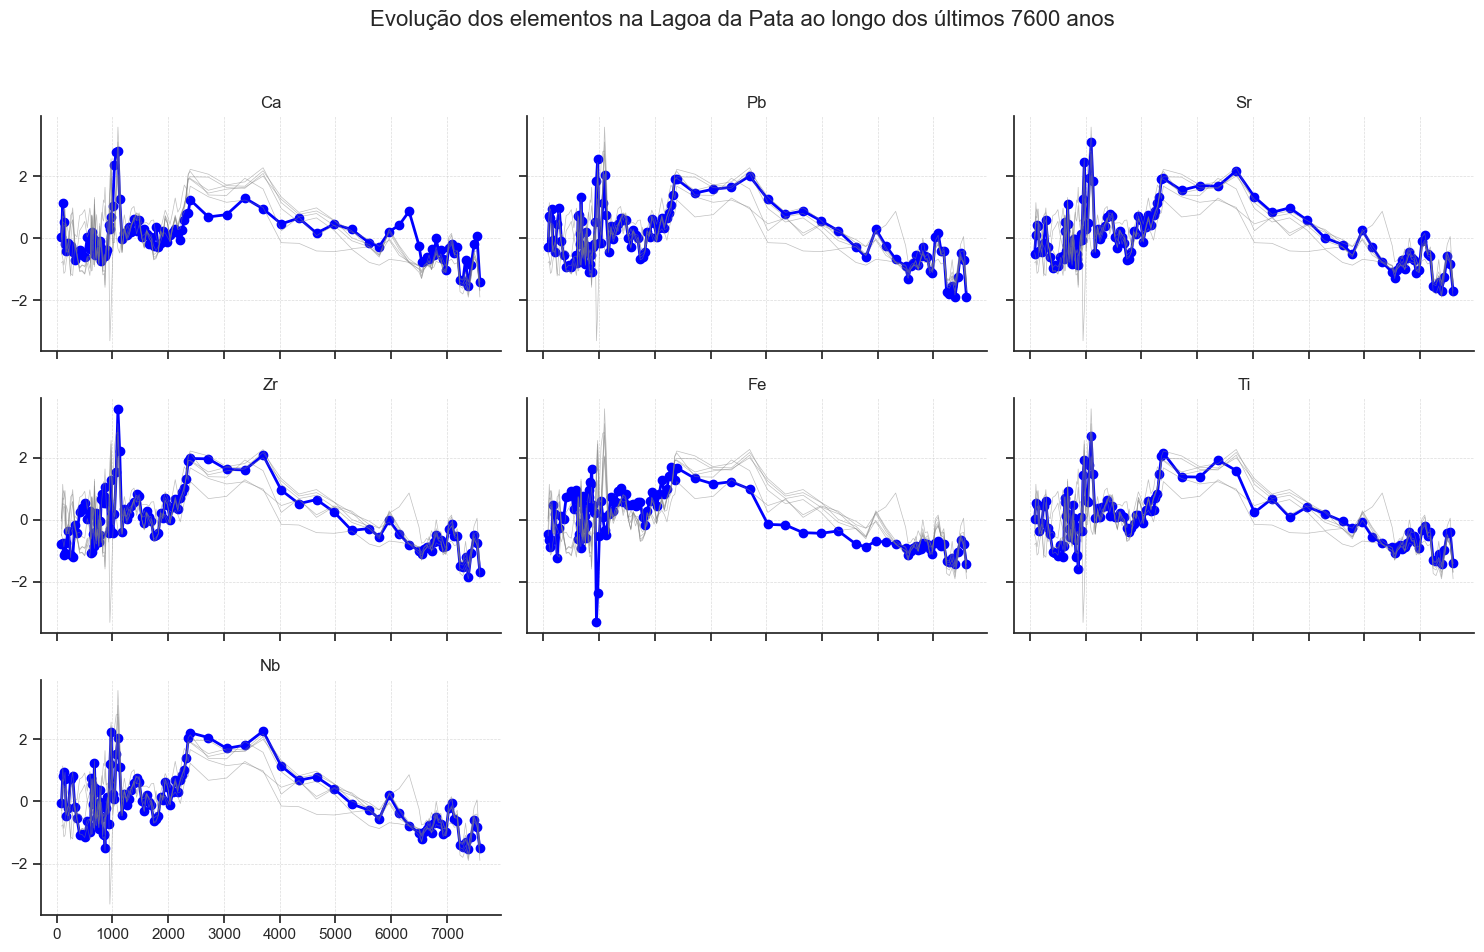

In [282]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_excel(r'C:\Users\nayar\OneDrive\Documentos\docs facul\Mestrado\xrf.xlsx', engine='openpyxl')

elements = data.columns[1:]  #selecionar os elementos, excluindo a cocluna 'Age'
num_elements = len(elements)

fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten() #flatten transforma uma matriz bidimensional em uma lista, facilitando ao buscar cada subplot por seu indice

#  Gráficos
for i, element in enumerate(elements):
    # Grafico para o elemento atual (que ficará destacado)
    ax = axes[i]
    ax.plot(data['Age'], data[element], color='blue', marker='o', linewidth=2, label=element)
    
    # Adicionar os outros elementos como linhas de fundo em cinza
    for other_element in elements:
        if other_element != element:
            ax.plot(data['Age'], data[other_element], color='gray', linewidth=0.5, alpha=0.5)

    # Configurações de cada subplot
    ax.set_title(element, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Loop para remover os últimos dois plots que estavam em branco
for j in range(num_elements, len(axes)):
    fig.delaxes(axes[j])

# Ajustes finais
fig.suptitle("Evolução dos elementos na Lagoa da Pata ao longo dos últimos 7600 anos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
